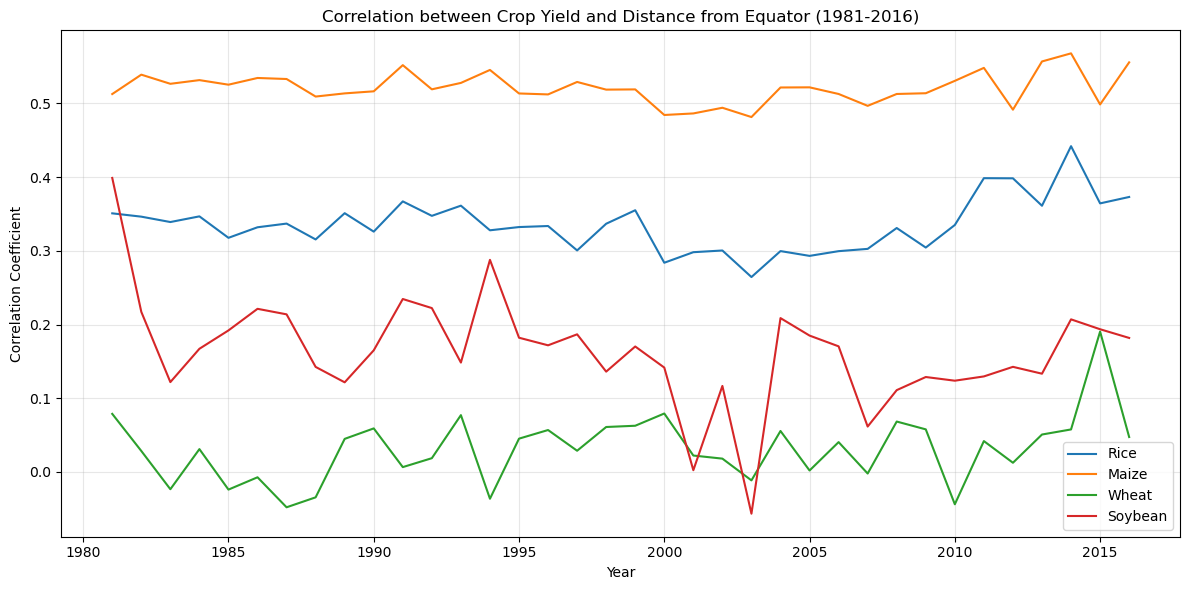

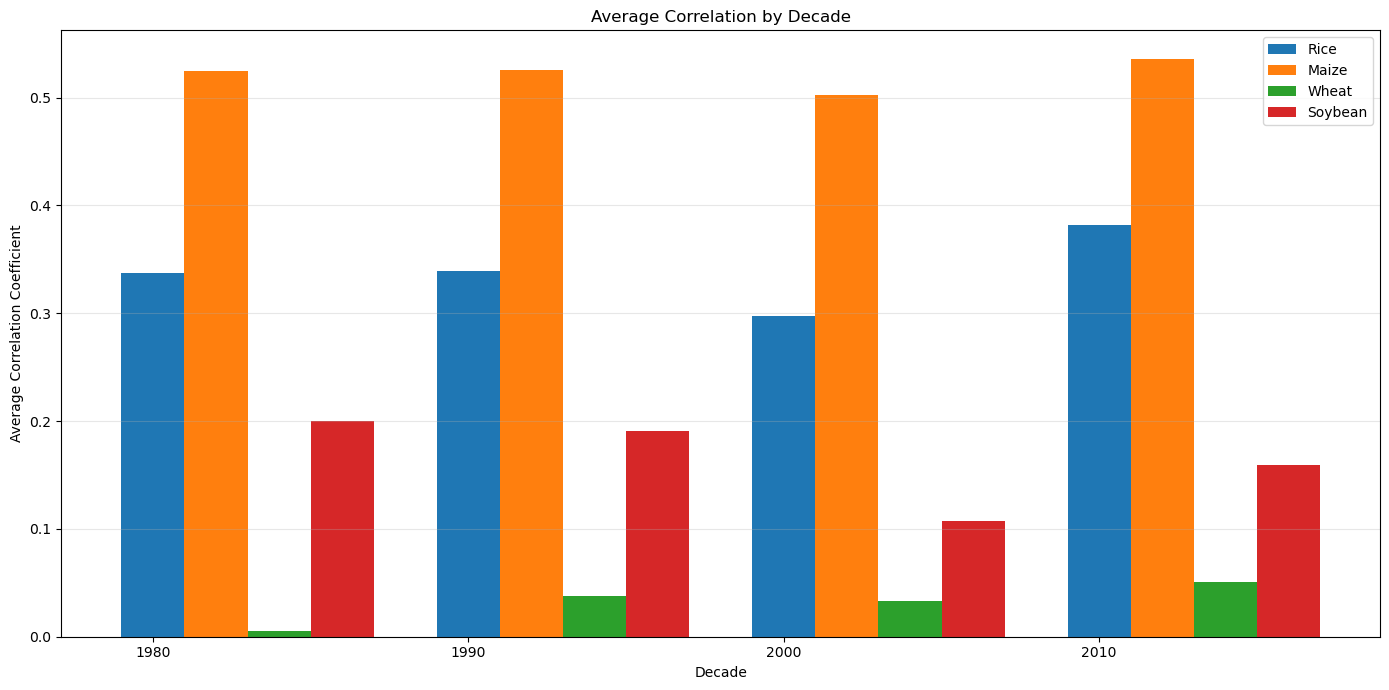

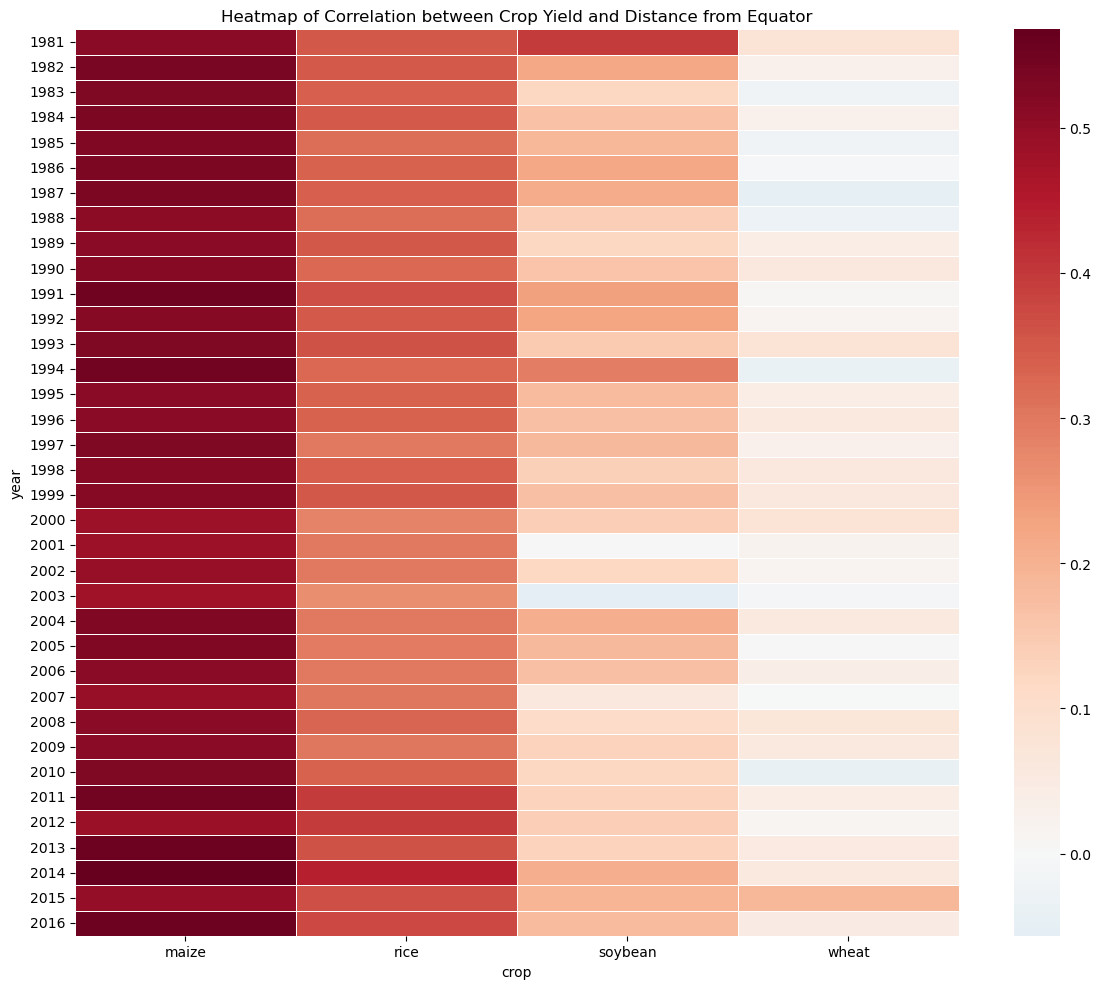

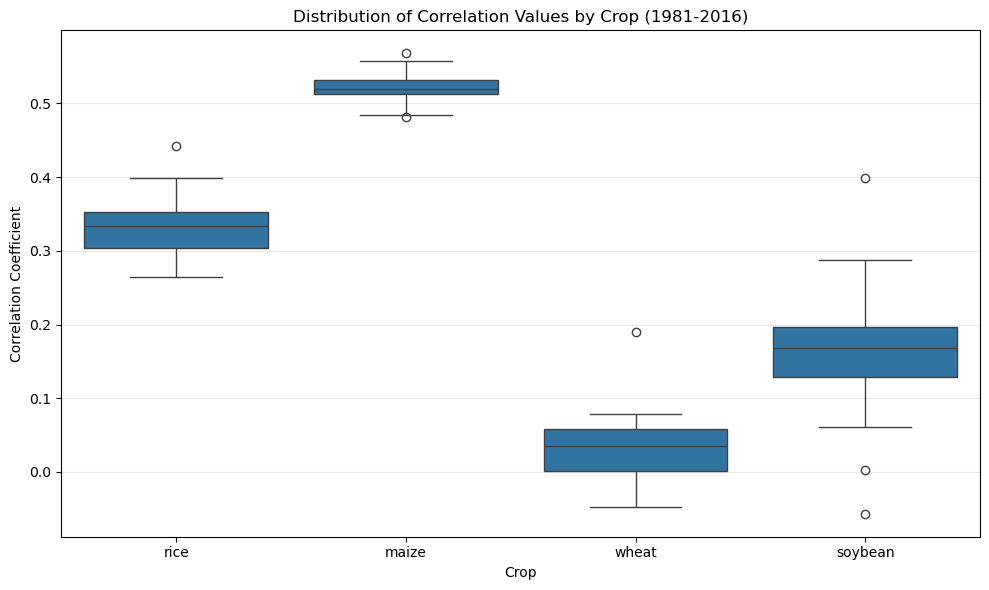

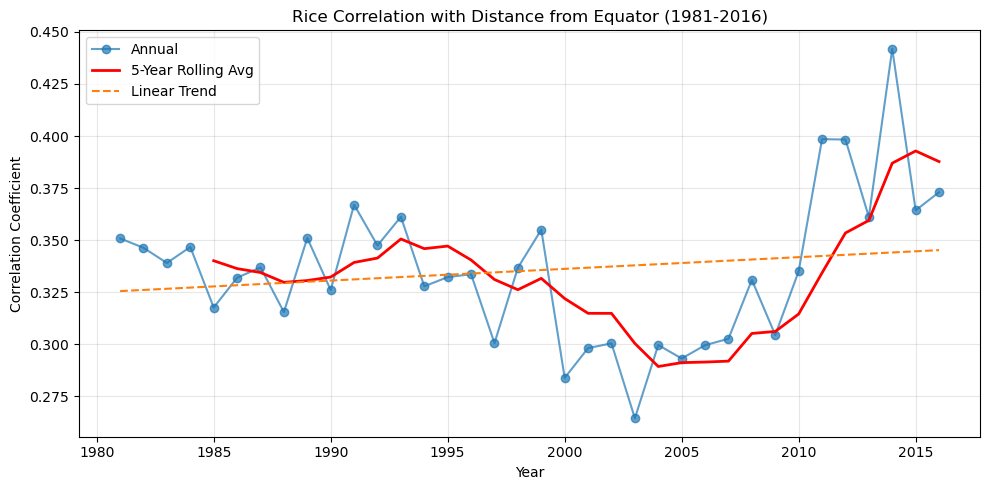

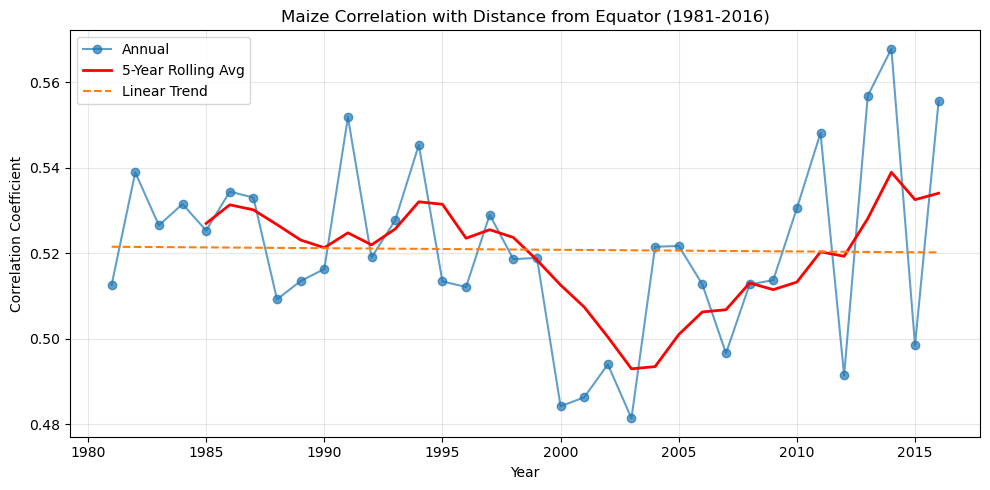

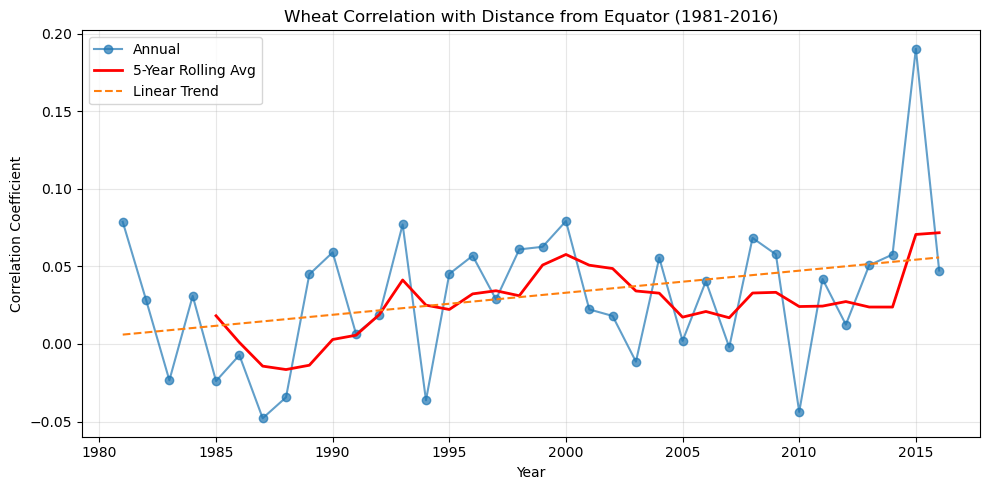

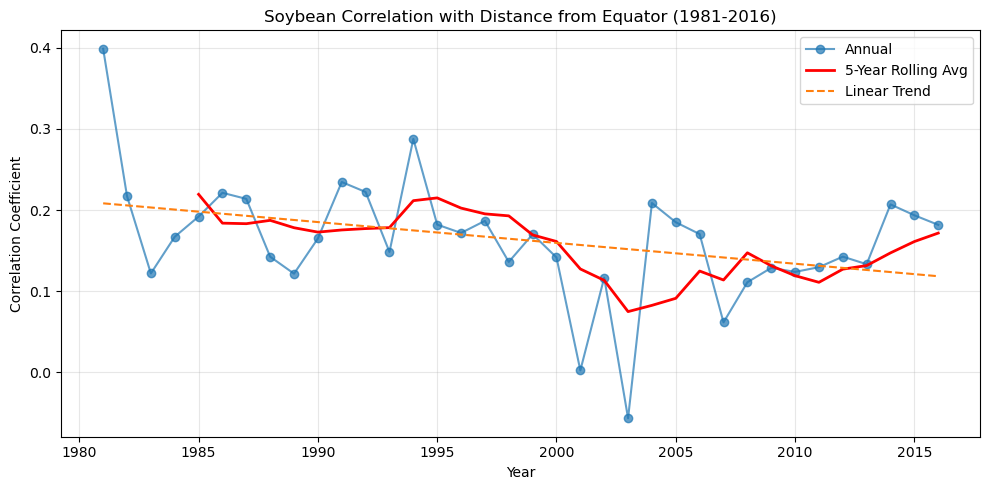

Summary Statistics of Correlations:
      crop     Min     Max      Mean   Std Dev
0    maize  0.4814  0.5678  0.520847  0.020982
1     rice  0.2644  0.4419  0.335331  0.035444
2  soybean -0.0566  0.3988  0.163400  0.074826
3    wheat -0.0479  0.1904  0.030933  0.045780


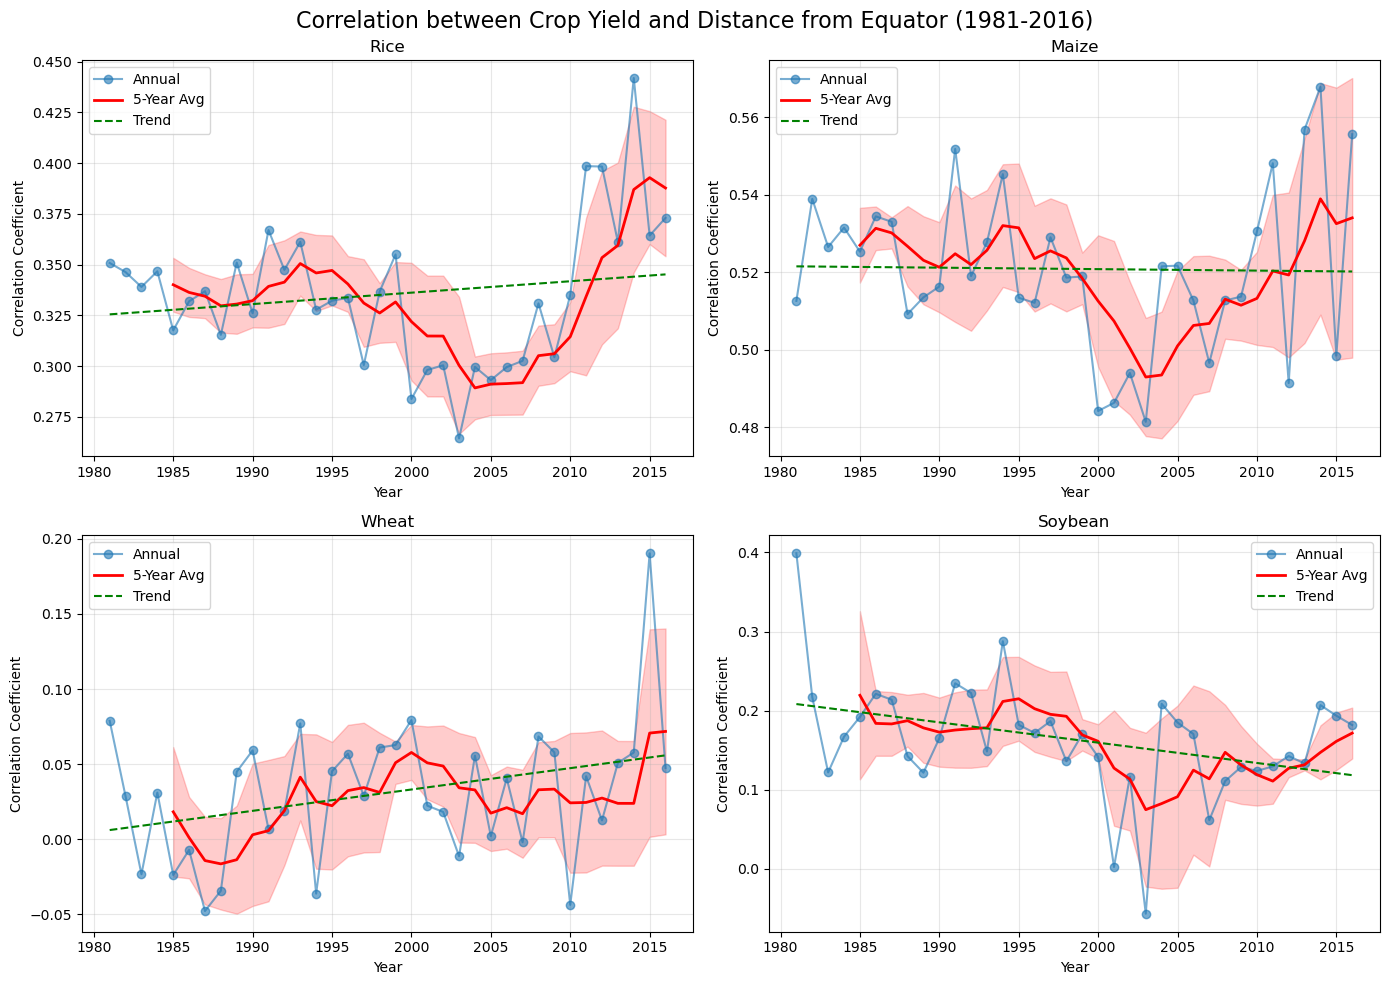

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define crop names and years
crops = ["rice", "maize", "wheat", "soybean"]
years = list(range(1981, 2017))

# correlation data
correlation_data = {
    "rice": {
        1981: 0.3508, 1982: 0.3463, 1983: 0.339, 1984: 0.3467, 1985: 0.3176, 
        1986: 0.3319, 1987: 0.3369, 1988: 0.3154, 1989: 0.351, 1990: 0.326, 
        1991: 0.367, 1992: 0.3474, 1993: 0.3612, 1994: 0.3278, 1995: 0.3322, 
        1996: 0.3336, 1997: 0.3005, 1998: 0.3367, 1999: 0.355, 2000: 0.2838, 
        2001: 0.2981, 2002: 0.3004, 2003: 0.2644, 2004: 0.2996, 2005: 0.2931, 
        2006: 0.2995, 2007: 0.3026, 2008: 0.3309, 2009: 0.3044, 2010: 0.335, 
        2011: 0.3985, 2012: 0.3983, 2013: 0.3611, 2014: 0.4419, 2015: 0.3643, 
        2016: 0.373
    },
    "maize": {
        1981: 0.5126, 1982: 0.5389, 1983: 0.5265, 1984: 0.5315, 1985: 0.5253, 
        1986: 0.5344, 1987: 0.533, 1988: 0.5092, 1989: 0.5135, 1990: 0.5163, 
        1991: 0.5518, 1992: 0.519, 1993: 0.5277, 1994: 0.5453, 1995: 0.5134, 
        1996: 0.5121, 1997: 0.529, 1998: 0.5186, 1999: 0.5189, 2000: 0.4842, 
        2001: 0.4863, 2002: 0.494, 2003: 0.4814, 2004: 0.5215, 2005: 0.5217, 
        2006: 0.5127, 2007: 0.4966, 2008: 0.5127, 2009: 0.5137, 2010: 0.5305, 
        2011: 0.5481, 2012: 0.4914, 2013: 0.5568, 2014: 0.5678, 2015: 0.4985, 
        2016: 0.5556
    },
    "wheat": {
        1981: 0.0788, 1982: 0.0285, 1983: -0.0234, 1984: 0.031, 1985: -0.0239, 
        1986: -0.0072, 1987: -0.0479, 1988: -0.0344, 1989: 0.0449, 1990: 0.0591, 
        1991: 0.0066, 1992: 0.0187, 1993: 0.0771, 1994: -0.0363, 1995: 0.0452, 
        1996: 0.0569, 1997: 0.0288, 1998: 0.061, 1999: 0.0627, 2000: 0.0793, 
        2001: 0.0223, 2002: 0.0181, 2003: -0.0114, 2004: 0.0556, 2005: 0.002, 
        2006: 0.0405, 2007: -0.0021, 2008: 0.0684, 2009: 0.0578, 2010: -0.0438, 
        2011: 0.0419, 2012: 0.0125, 2013: 0.0508, 2014: 0.0577, 2015: 0.1904, 
        2016: 0.0474
    },
    "soybean": {
        1981: 0.3988, 1982: 0.2172, 1983: 0.1219, 1984: 0.1671, 1985: 0.192, 
        1986: 0.2213, 1987: 0.2138, 1988: 0.1425, 1989: 0.1216, 1990: 0.165, 
        1991: 0.2346, 1992: 0.2223, 1993: 0.1484, 1994: 0.2877, 1995: 0.1821, 
        1996: 0.1718, 1997: 0.1867, 1998: 0.1361, 1999: 0.1702, 2000: 0.1416, 
        2001: 0.0024, 2002: 0.1167, 2003: -0.0566, 2004: 0.2087, 2005: 0.185, 
        2006: 0.1704, 2007: 0.0616, 2008: 0.111, 2009: 0.1288, 2010: 0.1238, 
        2011: 0.1296, 2012: 0.1426, 2013: 0.1333, 2014: 0.207, 2015: 0.1936, 
        2016: 0.1818
    }
}

# Convert to DataFrame for easier manipulation
df_data = []
for crop in correlation_data:
    for year in correlation_data[crop]:
        df_data.append({
            'crop': crop,
            'year': year,
            'correlation': correlation_data[crop][year]
        })

df = pd.DataFrame(df_data)

# Create a line plot for all crops
plt.figure(figsize=(12, 6))
for crop in crops:
    crop_data = df[df['crop'] == crop]
    plt.plot(crop_data['year'], crop_data['correlation'], label=crop.capitalize())

plt.title('Correlation between Crop Yield and Distance from Equator (1981-2016)')
plt.xlabel('Year')
plt.ylabel('Correlation Coefficient')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig('correlation_by_year.png')
plt.show()

# Calculate average correlation by decade for each crop
df['decade'] = (df['year'] // 10) * 10  # Group into decades (1980s, 1990s, etc.)
decade_avg = df.groupby(['crop', 'decade'])['correlation'].mean().reset_index()

# Create a bar plot for decade averages
plt.figure(figsize=(14, 7))
for i, crop in enumerate(crops):
    crop_data = decade_avg[decade_avg['crop'] == crop]
    positions = np.array(range(len(crop_data['decade']))) + (i * 0.2)
    plt.bar(positions, crop_data['correlation'], width=0.2, label=crop.capitalize())

plt.xticks(range(len(decade_avg['decade'].unique())), sorted(decade_avg['decade'].unique()))
plt.title('Average Correlation by Decade')
plt.xlabel('Decade')
plt.ylabel('Average Correlation Coefficient')
plt.grid(True, alpha=0.3, axis='y')
plt.legend()
plt.tight_layout()
plt.savefig('correlation_by_decade.png')
plt.show()

# Create a heatmap to visualize correlation patterns
correlation_matrix = pd.pivot_table(df, values='correlation', 
                                   index='year', 
                                   columns='crop')
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='RdBu_r', center=0, 
           annot=False, linewidths=0.5)
plt.title('Heatmap of Correlation between Crop Yield and Distance from Equator')
plt.tight_layout()
plt.savefig('correlation_heatmap.png')
plt.show()

# Create boxplots to compare the distribution of correlations
plt.figure(figsize=(10, 6))
sns.boxplot(x='crop', y='correlation', data=df)
plt.title('Distribution of Correlation Values by Crop (1981-2016)')
plt.xlabel('Crop')
plt.ylabel('Correlation Coefficient')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig('correlation_boxplot.png')
plt.show()

# Calculate rolling averages to identify trends
window_size = 5  # 5-year rolling average
for crop in crops:
    crop_data = df[df['crop'] == crop].sort_values('year')
    crop_data['rolling_avg'] = crop_data['correlation'].rolling(window=window_size).mean()
    #weights = np.ones(window_size)/window_size
    #crop_data['moving_avg'] = np.convolve(crop_data['correlation'], weights, mode='same')
    
    plt.figure(figsize=(10, 5))
    plt.plot(crop_data['year'], crop_data['correlation'], 'o-', alpha=0.7, label='Annual')
    plt.plot(crop_data['year'], crop_data['rolling_avg'], 'r-', linewidth=2, label=f'{window_size}-Year Rolling Avg')
    
    # Add trend line
    z = np.polyfit(crop_data['year'], crop_data['correlation'], 1)
    p = np.poly1d(z)
    plt.plot(crop_data['year'], p(crop_data['year']), '--', label='Linear Trend')
    
    plt.title(f'{crop.capitalize()} Correlation with Distance from Equator (1981-2016)')
    plt.xlabel('Year')
    plt.ylabel('Correlation Coefficient')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.savefig(f'{crop}_correlation_trend.png')
    plt.show()

# Create a summary table
summary = df.groupby('crop')['correlation'].agg([
    ('Min', 'min'), 
    ('Max', 'max'), 
    ('Mean', 'mean'), 
    ('Std Dev', 'std')
]).reset_index()

print("Summary Statistics of Correlations:")
print(summary)

# Save the summary to CSV
summary.to_csv('correlation_summary.csv', index=False)

# Bonus: Create a combined visualization showing the original correlations for each crop
# and a shaded area representing the range of variation
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()

for i, crop in enumerate(crops):
    crop_data = df[df['crop'] == crop].sort_values('year')
    
    # Calculate rolling statistics
    crop_data['rolling_mean'] = crop_data['correlation'].rolling(window=window_size).mean()
    crop_data['rolling_std'] = crop_data['correlation'].rolling(window=window_size).std()
    
    # Plot
    axs[i].plot(crop_data['year'], crop_data['correlation'], 'o-', alpha=0.6, label='Annual')
    axs[i].plot(crop_data['year'], crop_data['rolling_mean'], 'r-', linewidth=2, label=f'{window_size}-Year Avg')
    
    # Add confidence band (mean ± std)
    upper = crop_data['rolling_mean'] + crop_data['rolling_std']
    lower = crop_data['rolling_mean'] - crop_data['rolling_std']
    axs[i].fill_between(crop_data['year'], lower, upper, alpha=0.2, color='red')
    
    # Add trend line
    z = np.polyfit(crop_data['year'], crop_data['correlation'], 1)
    p = np.poly1d(z)
    axs[i].plot(crop_data['year'], p(crop_data['year']), '--', color='green', label='Trend')
    
    axs[i].set_title(f'{crop.capitalize()}')
    axs[i].set_xlabel('Year')
    axs[i].set_ylabel('Correlation Coefficient')
    axs[i].grid(True, alpha=0.3)
    axs[i].legend()

plt.suptitle('Correlation between Crop Yield and Distance from Equator (1981-2016)', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.savefig('crop_correlations_combined.png')
plt.show()